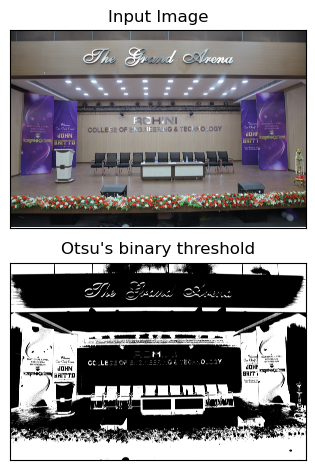

In [1]:
#SEGMENTATION
import numpy as np
import cv2 #OPEN CV
from matplotlib import pyplot as plt
img= cv2.imread(r'H:/1.jpg')
b,g,r=cv2.split(img)
rgb_img=cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#noise removal
kernel = np.ones((2,2),np.uint8)
#opening- cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel, iterations = 2)
#sure background area
sure_bg= cv2.dilate(closing, kernel, iterations=3)
#Finding sure foreground area
dist_transform = cv2.distanceTransform (sure_bg,cv2.DIST_L2,3)
#Threshold#Threshold
ret, sure_fg= cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
#Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
#Marker Labelling
ret, markers= cv2.connectedComponents (sure_fg)
#Add one to all labels so that sure background is not 8, but 1 markers markers+1 I
#Now, mark the region of unknown with zero
markers [unknown==255] = 0
markers= cv2.watershed(img, markers)
img[markers==-1]=[255,0,0]
plt.subplot(211), plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png', thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

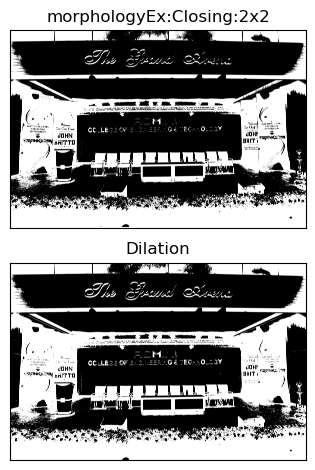

In [2]:
plt.subplot(211), plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png', sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

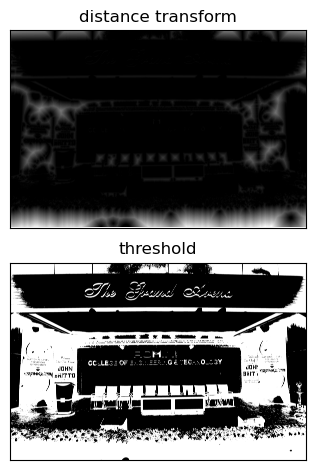

In [3]:
plt.subplot(211), plt.imshow(dist_transform, 'gray')
plt.title("distance transform"), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(sure_bg, 'gray')
plt.title("threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

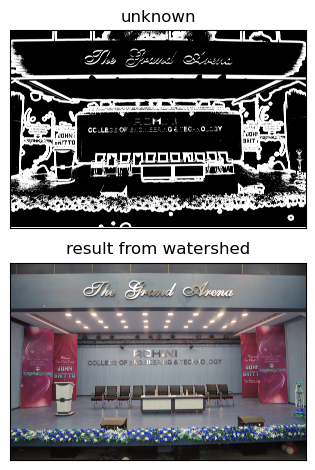

In [4]:
plt.subplot(211), plt.imshow(unknown, 'gray')
plt.title("unknown"), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(img, 'gray')
plt.title("result from watershed"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [5]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel 
import skimage 
import warnings
warnings.filterwarnings("ignore")

In [6]:
images=Image.open("‪H:/2.JPG")
images=images.resize((320,225))
image=np.array(images)
plt.imshow(images)

OSError: [Errno 22] Invalid argument: '\u202aH:/2.JPG'

In [ ]:
gray=rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [ ]:
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=1
    else:
        arr[i]=0
gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

In [ ]:
plt.imshow(gray_segmented,cmap='gray')

In [ ]:
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[1]=4
    elif arr[1]>=0.75:
        arr[1]=3
    elif arr[i]>0.5:
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
gray_segmented_2=arr.reshape(gray.shape[0], gray. shape[1])

In [ ]:
plt.figure(figsize=(18,8))
plt.imshow(gray_segmented_2,cmap='pink')
plt.axis("off")
plt.show()

In [ ]:
#EDGE BASED SEGMENTATION

#we are gonna use kernel Laplace here to discover the edges in the image :)
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
out_1 = ndimage.convolve(gray_segmented_2, kernel_laplace, mode='reflect')
arr=[]
for i in out_1.flatten():
    if i == 0:
        arr.append(0)
    else:
        arr.append(-100)
arr=np.array(arr)
arr=arr.reshape(out_1.shape[0],out_1.shape[1])
plt.imshow(arr, cmap='gray', interpolation='nearest')